In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [13]:
df = pd.read_csv('hierarchical-clustering.csv')

In [14]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [16]:
df.shape

(200, 5)

In [17]:
df = df.dropna(subset=['Annual Income (k$)','Spending Score (1-100)'])

df=df[['Annual Income (k$)','Spending Score (1-100)']].values


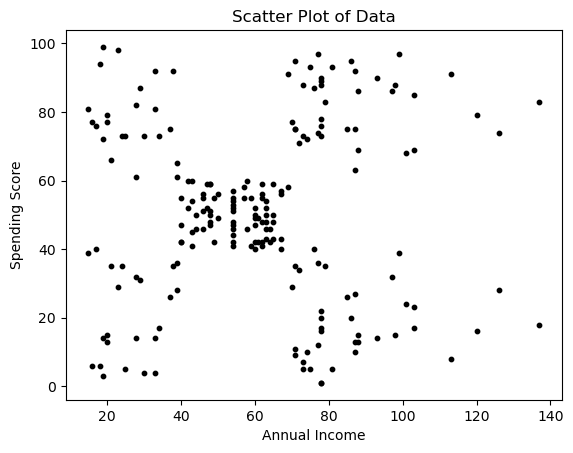

In [18]:
plt.scatter(df[:,0], df[:,1], s=10, c="black")
plt.title("Scatter Plot of Data")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()


In [20]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,init = 'k-means++', max_iter= 300, n_init= 10,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

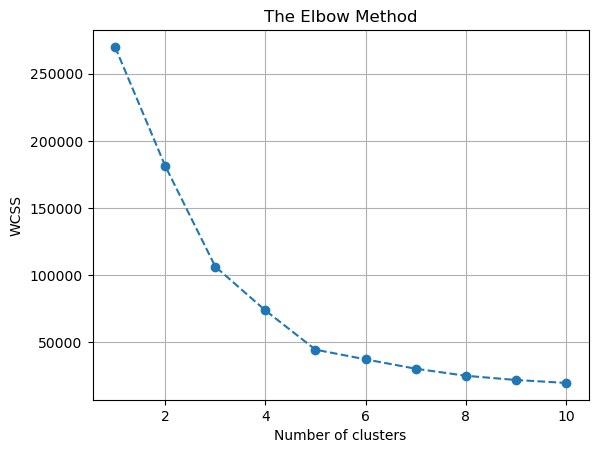

In [21]:
plt.plot(range(1,11), wcss,marker='o',linestyle='--')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()


In [22]:
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(df)
print(np.unique(labels))

[-1  0  1  2  3  4]


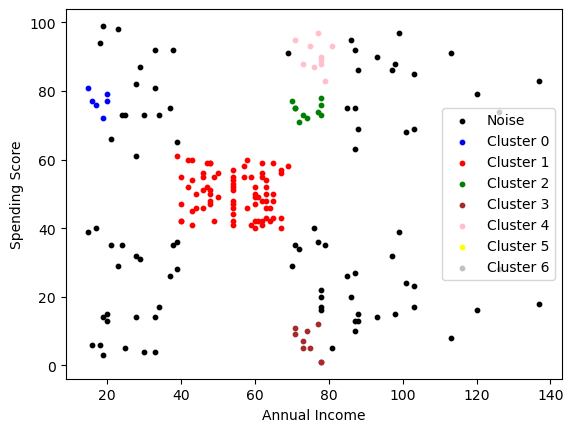

In [23]:
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 10, c = 'black',label='Noise')
plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue',label='Cluster 0')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red',label='Cluster 1')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green',label='Cluster 2')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'brown',label='Cluster 3')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'pink',label='Cluster 4')
plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = 'yellow',label='Cluster 5')
plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = 'silver',label='Cluster 6')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

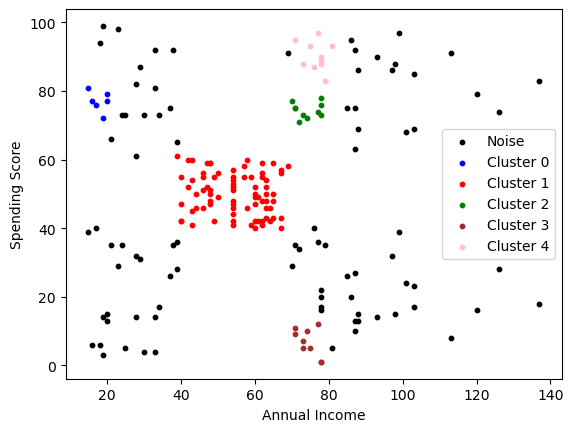

In [25]:
unique_labels = np.unique(labels)
colors = ['blue', 'red', 'green', 'brown', 'pink', 'yellow', 'silver']

# Loop over unique labels and assign colors to clusters
for label in unique_labels:
    # For noise points (-1), color them black
    if label == -1:
        plt.scatter(df[labels == label, 0], df[labels == label, 1], s=10, c='black', label='Noise')
    else:
        # For other clusters, assign colors from the list
        color = colors[label % len(colors)]  # Ensures it works if there are more than 6 clusters
        plt.scatter(df[labels == label, 0], df[labels == label, 1], s=10, c=color, label=f'Cluster {label}')

# Adding labels and legend
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
